# Data Splitting

In [402]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv("D:\Documents\Projects\Machine Learning\Datathon\LAPTOP MODEL\DATASETFINAL.csv")

df

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
C:\Users\nadhi\AppData\Local\Temp\ipykernel_15616\1464843338.py:6: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\Documents\Projects\Machine Learning\Datathon\LAPTOP MODEL\DATASETFINAL.csv")


,no,Brand,CPU,GPU,RAM Type,RAM Size,Storage,Screen Type,Refresh Rate,Uniqueness,Upgradeable,price,points,worth
0,1,ACER,8531,NaN,DDR5,8,512,IPS,60,0,1,5054831,9990,well-priced
1,2,ASUS,8657,NaN,DDR5,16,256,IPS,60,0,1,5099000,10013,well-priced
2,3,HP,8657,NaN,DDR4,16,512,IPS,60,0,1,5139000,9673,well-priced
3,4,LENOVO,8657,NaN,DDR5,8,256,IPS,60,0,0,5199000,7589,well-priced
4,5,ACER,5491,NaN,DDR4,8,512,IPS,60,0,1,5229000,7268,well-priced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,1122,HP,35055,19586.0,DDR5,16,1024,IPS,144,0,1,24960000,57125,overpriced
1122,1123,DELL,13383,NaN,DDR4,16,512,IPS,60,0,1,24990000,13132,overpriced
1123,1124,MSI,37148,17503.0,DDR5,16,1024,IPS,120,0,1,24990000,56122,overpriced
1124,1125,LENOVO,24919,14448.0,DDR5,32,1024,IPS,120,1,0,24999000,48531,overpriced


In [403]:
X = pd.get_dummies(  df.drop(["points"], axis=1))
y = df["points"]

X = X.fillna(0)




In [404]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection

In [405]:

from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000,
    
    alpha=0.0001,          
    penalty='l2',         
    learning_rate='adaptive',
    eta0=0.01,
    
    random_state=42))

model.fit(X_train,y_train)


d:\Documents\Projects\Machine Learning\Datathon\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


,steps,"[('standardscaler', ...), ('sgdregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15


# Validation Score


In [406]:


y_train_pred = model.predict(X_train)


r2 = r2_score(y_train, y_train_pred)
rmse = root_mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)

print(f"R2 : {r2}")
print(f"RMSE : {rmse}")
print(f"MAE : {mae}")


R2 : 0.9936501889805217
RMSE : 1167.1561466178214
MAE : 889.7351916346471


## Data Visualize Validation



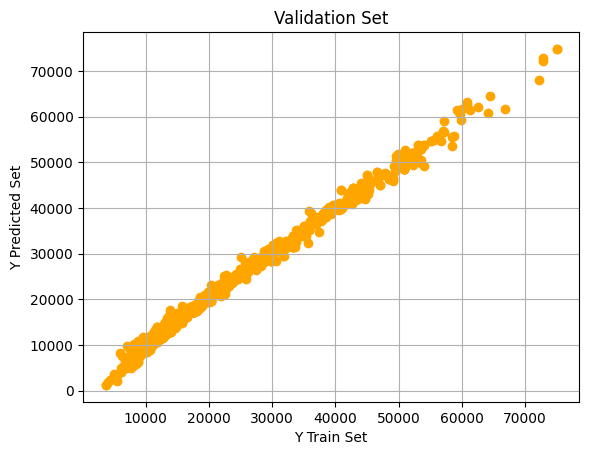

In [407]:
import matplotlib.pyplot as plt



plt.scatter(y_train, y_train_pred, color="orange")

plt.title("Validation Set")
plt.xlabel("Y Train Set")
plt.ylabel("Y Predicted Set")

plt.grid(True)
plt.show()



# Real Test Score

In [408]:

y_test_pred = model.predict(X_test)


r2 = r2_score(y_test, y_test_pred)
rmse = root_mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

print(f"R2 : {r2}")
print(f"RMSE : {rmse}")
print(f"MAE : {mae}")


R2 : 0.9929737671852574
RMSE : 1281.750562503106
MAE : 952.4677982847616


## Data Visualize Real



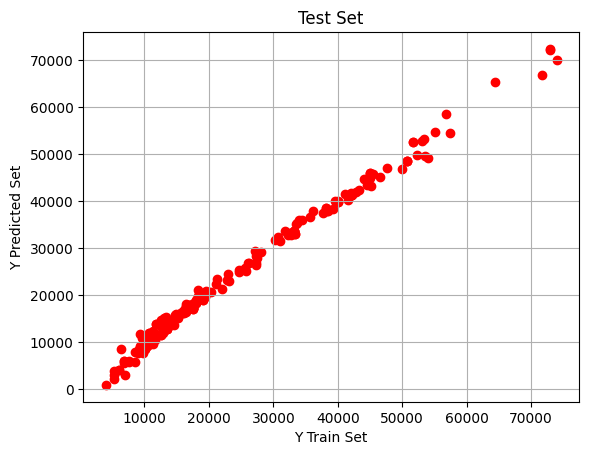

In [409]:




plt.scatter(y_test, y_test_pred, color="red")

plt.title("Test Set")
plt.xlabel("Y Train Set")
plt.ylabel("Y Predicted Set")

plt.grid(True)
plt.show()




In [410]:
price_ranges = [
    (18000, 21000, 5000000, 5499999),
    (21000, 25000, 5500000, 6000000),
    (25000, 28500, 6000000, 6499999),
    (28500, 32000, 6500000, 7000000),
    (32000, 36000, 7000000, 7999999),
    (36000, 40000, 8000000, 8999999),
    (40000, 50000, 9000000, 9999999),
    (50000, 60000, 10000000, 10999999),
    (60000, 76500, 11000000, 11999999),
    (76500, 93000, 12000000, 12999999),
    (93000, 106500, 13000000, 13999999),
    (106500, 120000, 14000000, 14999999),
    
    (120000, 125000, 17000000, 17999999),
    (125000, 130000, 18000000, 18999999),

    (122000, 125500, 17500000, 18400000),
    (128000, 130000, 18300000, 18999999),

    (130000, 140000, 19000000, 20999999),
    (140000, 150000, 21000000, 22999999),
    (150000, 165000, 23000000, 23999999),
    (165000, 180000, 24000000, 24999999),
    (180000, 195000, 25000000, 25999999),
    (195000, 210000, 26000000, 26999999),
]

def get_price_range(points):
    for p_min, p_max, price_min, price_max in price_ranges:
        if p_min < points <= p_max:
            return price_min, price_max
    return None, None



suggestion = []

for i in y_test_pred:
    
    finalprices = get_price_range(i)
    suggestion.append(finalprices)
   
    

  
suggestion

[(10000000, 10999999),
 (11000000, 11999999),
 (None, None),
 (None, None),
 (11000000, 11999999),
 (9000000, 9999999),
 (None, None),
 (8000000, 8999999),
 (9000000, 9999999),
 (None, None),
 (7000000, 7999999),
 (9000000, 9999999),
 (9000000, 9999999),
 (None, None),
 (None, None),
 (5000000, 5499999),
 (5500000, 6000000),
 (None, None),
 (9000000, 9999999),
 (None, None),
 (None, None),
 (None, None),
 (8000000, 8999999),
 (5500000, 6000000),
 (6500000, 7000000),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (5000000, 5499999),
 (5000000, 5499999),
 (8000000, 8999999),
 (None, None),
 (None, None),
 (8000000, 8999999),
 (None, None),
 (None, None),
 (None, None),
 (9000000, 9999999),
 (None, None),
 (5000000, 5499999),
 (7000000, 7999999),
 (9000000, 9999999),
 (9000000, 9999999),
 (11000000, 11999999),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (9000000, 9999999),
 (None, None),
 (None, None),
 (11000000, 11999999),
 (5

In [ ]:
import pickle

with open ('SGDRegression.pkl', 'wb') as files:
    pickle.dump(model,files)